In [3]:
import os
print("cwd:", os.getcwd())

cwd: /Users/jsennett/Code/top-k-insights/report/notebooks


In [209]:
import pandas as pd
import numpy as np
import scipy
import heapq
import scipy.stats
import matplotlib.pyplot as plt

## Number of papers per author

In [ ]:
filename = "/Users/jsennett/Code/top-k-insights/data/all-author-paper-counts-by-year.csv"
df = pd.read_csv(filename, encoding='mac_roman')

In [30]:
print(len(data), "rows (4.4 million)")
print(df.columns)
df.head()


4395104 rows (4.4 million)
Index(['num_papers', 'year', 'authid', 'rank', 'log_rank', 'log_num_papers'], dtype='object')


,num_papers,year,authid,rank,log_rank,log_num_papers
0,1,1990,0,1571776.0,20.583964,0.000000
1,4,1990,1,329751.0,18.331018,2.000000
2,5,1990,3,230373.0,17.813612,2.321928
3,1,1990,4,1571777.0,20.583965,0.000000
4,1,1990,7,1571778.0,20.583966,0.000000


In [20]:
df.describe()

,num_papers,year,authid
count,4.395104e+06,4.395104e+06,4.395104e+06
mean,1.980562e+00,2.007571e+03,5.751863e+05
std,2.490828e+00,6.059493e+00,4.682082e+05
min,1.000000e+00,1.990000e+03,0.000000e+00
25%,1.000000e+00,2.004000e+03,1.710480e+05
50%,1.000000e+00,2.009000e+03,4.489020e+05
75%,2.000000e+00,2.012000e+03,9.167660e+05
max,2.000000e+02,2.015000e+03,1.691340e+06


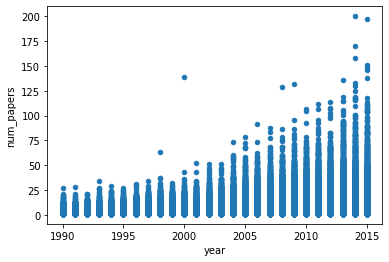

In [23]:
# Scatter plots of some relevant measures
df.plot.scatter('year', 'num_papers')

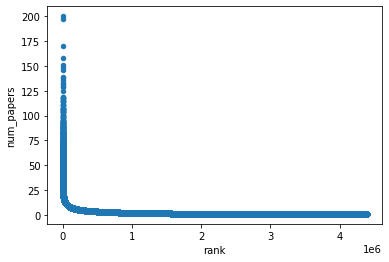

In [28]:
# Plot num_papers versus rank
df['rank'] = df['num_papers'].rank(method='first', ascending=False)
df.plot.scatter('rank', 'num_papers')

/Users/jsennett/.pyenv/versions/3.6.1/envs/topk/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.log2 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log2 instead
  """Entry point for launching an IPython kernel.
/Users/jsennett/.pyenv/versions/3.6.1/envs/topk/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.log2 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log2 instead
  


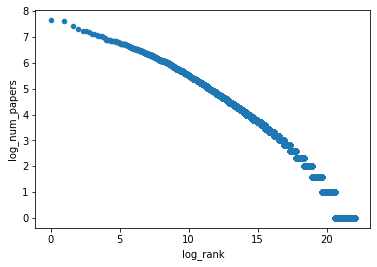

In [29]:
df['log_rank'] = scipy.log2(df['rank'])
df['log_num_papers'] = scipy.log2(df['num_papers'])
df.plot.scatter('log_rank', 'log_num_papers')

## All papers

In [5]:
papers_filename = "/Users/jsennett/Code/top-k-insights/data/all-papers.csv"
p_df = pd.read_csv(papers_filename, encoding='mac_roman', dtype = {'school': str})

In [6]:
print(len(p_df), "rows (4.4 million)")
print(p_df.columns)
p_df.head()

2991406 rows (4.4 million)
Index(['paperid', 'venue_name', 'year', 'school', 'venue_type'], dtype='object')


,paperid,venue_name,year,school,venue_type
0,5389,Future Generation Comp. Syst.,2004,NaN,0
1,5390,Future Generation Comp. Syst.,2010,NaN,0
2,5407,Future Generation Comp. Syst.,2009,NaN,0
3,5414,Future Generation Comp. Syst.,2001,NaN,0
4,5449,Future Generation Comp. Syst.,2004,NaN,0


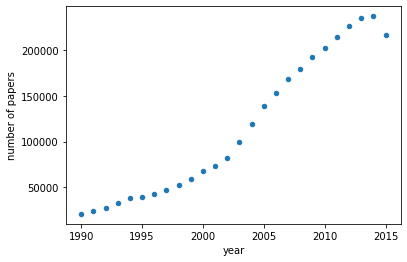

In [7]:
# Insight: positive trend of paper counts over year considering the full set of data
p_df.groupby('year')\
    .agg('count')\
    .reset_index()\
    .rename(columns={'paperid':'number of papers'})\
    .plot.scatter('year', 'number of papers')

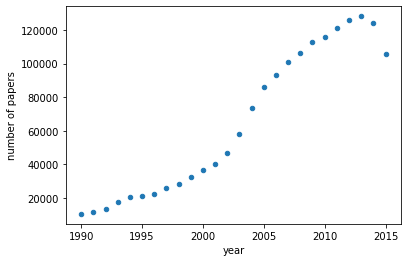

In [8]:
# Insight: positive trend of paper counts over year considering the full set of data
p_df[p_df['venue_type'] == 1].groupby('year')\
    .agg('count')\
    .reset_index()\
    .rename(columns={'paperid':'number of papers'})\
    .plot.scatter('year', 'number of papers')

In [9]:
p_df[p_df['venue_type'] == 0]['year'].value_counts()

2014    113308
2015    111441
2013    107439
2012    100868
2011     92914
2010     86390
2009     79643
2008     72474
2007     66958
2006     59665
2005     52474
2004     44429
2003     40648
2002     35316
2001     32921
2000     30846
1999     26084
1998     23625
1997     21491
1996     20078
1995     18390
1994     16810
1993     15366
1992     13455
1991     11976
1990     10266
Name: year, dtype: int64

In [10]:
p_df['M'] = 1

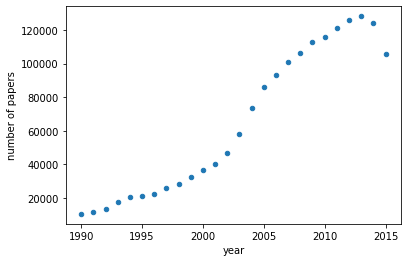

In [11]:
# Insight: positive trend of paper counts over year considering the full set of data
p_df[p_df['venue_type'] == 1].groupby('year')\
    .agg('count')\
    .reset_index()\
    .rename(columns={'paperid':'number of papers'})\
    .plot.scatter('year', 'number of papers')

In [32]:
def scatter(df, dimension):
    return df.groupby(dimension)\
        .agg('count')\
        .reset_index()\
        .rename(columns={'paperid':'number of papers'})\
        .plot.scatter(dimension, 'number of papers')

In [23]:
def rank_scatter(df, dimension):
    rank_df = df.groupby(dimension).agg('count').reset_index()
    rank_df['rank'] = rank_df['M'].rank(method='first', ascending=False)
    return rank_df.plot.scatter(x='rank', y='M', label='rank of ' + dimension)

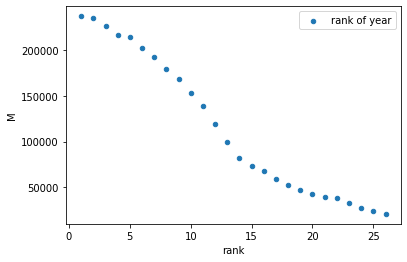

In [26]:
rank_scatter(p_df, 'year')

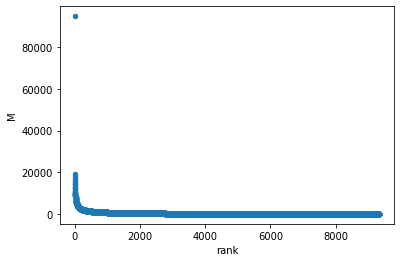

In [15]:
venue_ranks['rank'] = venue_ranks['M'].rank(method='first', ascending=False)
venue_ranks.plot.scatter(x='rank', y='M')

In [20]:
p_df['paperid'].rank()

0          4674.0
1          4675.0
2          4692.0
3          4699.0
4          4734.0
            ...  
2991401    4583.0
2991402    4617.0
2991403    4627.0
2991404    4646.0
2991405    4653.0
Name: paperid, Length: 2991406, dtype: float64

In [ ]:
p_df.groupby('venue_name').agg('count').head().rank()

df['rank'] = df['num_papers'].rank(method='first', ascending=False)

In [41]:
result_set = p_df.groupby(['venue_name', 'year']).agg({'M':'sum'}).reset_index()
result_set['M'] = result_set.sort_values("year")['M'].diff()
result_set.head()

,venue_name,year,M
0,"""CloudCom-Asia",2015,7.0
1,#MSM,2011,-3.0
2,#MSM,2012,-13.0
3,#MSM,2013,-74.0
4,#MSM,2014,-78.0


In [ ]:
result_set['absM'] = abs(result_set['M'])

In [ ]:
rank_scatter(result_set, 'absM')

In [49]:
import scipy
result_set['logabsM'] = scipy.log2(result_set['absM'])
result_set['logrank'] = scipy.log2(result_set['M'].rank(method='first', ascending=False))

/Users/jsennett/.pyenv/versions/3.6.1/envs/topk/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.log2 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log2 instead
  
/Users/jsennett/.pyenv/versions/3.6.1/envs/topk/lib/python3.6/site-packages/numpy/lib/scimath.py:122: RuntimeWarning: invalid value encountered in less
  if any(isreal(x) & (x < 0)):
/Users/jsennett/.pyenv/versions/3.6.1/envs/topk/lib/python3.6/site-packages/numpy/lib/scimath.py:412: RuntimeWarning: divide by zero encountered in log2
  return nx.log2(x)
/Users/jsennett/.pyenv/versions/3.6.1/envs/topk/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.log2 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log2 instead
  This is separate from the ipykernel package so we can avoid doing imports until


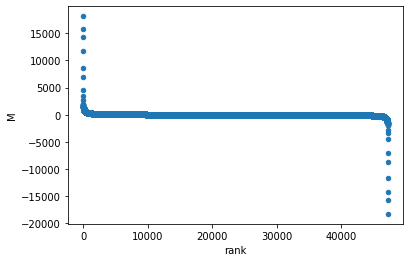

In [63]:
result_set['rank'] = result_set['M'].rank(method='first', ascending=False)
result_set.plot.scatter('rank', 'M')

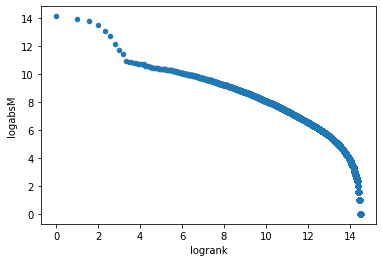

In [68]:
result_set[result_set['M'] > 0].plot.scatter('logrank', 'logabsM')

In [ ]:
result_set[result_set['M'] > 50].plot.scatter('rank', 'M')

In [ ]:
cutoff = 0.2
result_set[result_set['rank'] < cutoff * len(result_set)].plot.scatter('logrank', 'logabsM')

In [108]:
# pct of total:
pct_of_total = p_df.copy()

In [109]:
pct_of_total = pct_of_total.groupby(['venue_name']).agg({'M':'sum'})
pct_of_total = pct_of_total.reset_index(drop=False)
pct_of_total.head()

,venue_name,M
0,"""CloudCom-Asia",29
1,#MSM,64
2,10th Anniversary Colloquium of UNU/IIST,26
3,15. WLP,12
4,1999 ACM SIGMOD Workshop on Research Issues in...,12


In [110]:
pct_of_total['M'] = 100 * pct_of_total['M'] / sum(pct_of_total['M'])

In [ ]:
pct_of_total['rank'] = pct_of_total['M'].rank(method='first', ascending=False)
pct_of_total.plot.scatter('rank', 'M')

In [ ]:
pct_of_total['logrank'] = scipy.log2(pct_of_total['rank'])
pct_of_total['logM'] = scipy.log2(pct_of_total['M'])
pct_of_total.plot.scatter('logrank', 'logM')

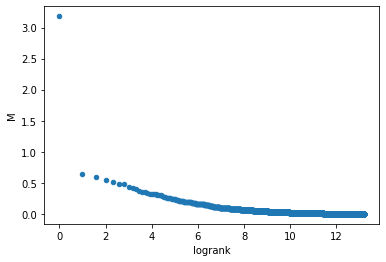

In [114]:
pct_of_total.plot.scatter('logrank', 'M')

In [ ]:
pct_of_total['M'] = 100 * result_set['M'] / sum(result_set['M'])
result_set['M'] = 100 * result_set[self.measure] / sum(result_set[self.measure])
p_df.head()

In [127]:
# Validate composite extractor result sets
"""
INFO:root:Valid SG/CE combo: subspace({'year': 2000}), dim(venue_type), ce([['count', 'count'], ['pct', 'year']])
INFO:root:extract_result_set({'year': 2000}, venue_type, [['count', 'count'], ['pct', 'year']]
INFO:root:RESULT SET:
     venue_type  year  count mod2         M
10           0  2000  30846    *  2.363180
36           1  2000  36539    *  2.175786
62           3  2000     43    *  0.633844
"""
print(100 * len(p_df[(p_df['year']==2000) & (p_df['venue_type'] == 0)]) / len(p_df[p_df['venue_type']==0]))
print(100 * len(p_df[(p_df['year']==2000) & (p_df['venue_type'] == 1)]) / len(p_df[p_df['venue_type']==1]))
print(100 * len(p_df[(p_df['year']==2000) & (p_df['venue_type'] == 3)]) / len(p_df[p_df['venue_type']==3]))

2.3631801727605293
2.175786183558252
0.6338443396226415


In [ ]:
"""
INFO:root:extract_result_set({'year': 2000}, venue_type, [['count', 'count'], ['delta_prev', 'year']]
returning result set:

    venue_type  year  count mod2     M
1           0  2000  30846    *  4762
3           1  2000  36539    *  3805
5           3  2000     43    *     3
"""
print(len(p_df[(p_df['year'] == 2000) & (p_df['venue_type'] == 0)]) - len(p_df[(p_df['year'] == 1999) & (p_df['venue_type'] == 0)]))
print(len(p_df[(p_df['year'] == 2000) & (p_df['venue_type'] == 1)]) - len(p_df[(p_df['year'] == 1999) & (p_df['venue_type'] == 1)]))
print(len(p_df[(p_df['year'] == 2000) & (p_df['venue_type'] == 3)]) - len(p_df[(p_df['year'] == 1999) & (p_df['venue_type'] == 3)]))

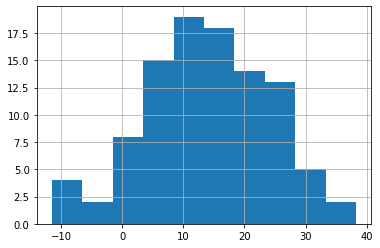

In [134]:
x = pd.DataFrame([10 * np.random.normal() + 15 for _ in range(100)], columns=['M'])
x['M'].hist()

In [ ]:
max(x['M'])
scipy.stats.norm.pdf()

In [ ]:
(38 - x['M'].mean()) / x['M'].std()

In [ ]:
scipy.stats.norm.ppf(100/)

In [ ]:
x.rank(method='first', ascending=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13f067eb8>]],
      dtype=object)

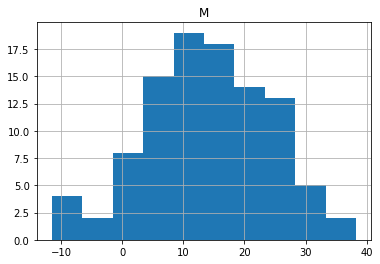

In [147]:
x.hist()

In [156]:
x['rank'] = x['M'].rank(ascending=True, method='first')
x['pct'] = x['rank'] / (len(x)+1)
x['Z'] = (x['M'] - x['M'].mean()) / x['M'].std()
x['predZ'] = scipy.stats.norm.pdf(x['pct'])
x['pred'] = x['pct'] * x['M'].std() + x['M'].mean()

In [ ]:
x['pred'].hist()

In [166]:
x.head(25)

,M,rank,pct,Z,predZ,pred
0,6.771423,22.0,0.217822,-0.700520,0.389589,15.949612
1,38.250489,100.0,0.990099,2.449180,0.244366,23.667987
2,-8.598282,3.0,0.029703,-2.238366,0.398766,14.069496
3,19.697190,73.0,0.722772,0.592793,0.307236,20.996242
4,-2.258100,6.0,0.059406,-1.603987,0.398239,14.366356
5,28.667375,94.0,0.930693,1.490323,0.258714,23.074266
6,7.262322,25.0,0.247525,-0.651402,0.386906,16.246473
7,30.158047,96.0,0.950495,1.639475,0.253940,23.272173
8,24.714445,85.0,0.841584,1.094804,0.279971,22.183684
9,-0.213637,8.0,0.079208,-1.399424,0.397693,14.564263


In [176]:
x.head()

,M
0,6.771423
1,38.250489
2,-8.598282
3,19.697190
4,-2.258100


In [177]:
xmean = x['M'].mean()
xstd = x["M"].std()

In [ ]:
x['rank'] = x['M'].rank(method='first')
x.plot.scatter('rank', 'M')

In [193]:
(1 - scipy.stats.norm.cdf(x_max_Z)) / (.01)

0.5536938553650228

In [198]:
alpha = 1/100
x_max_p = 1 - scipy.stats.norm.cdf(x_max_Z)
print(x_max_p)

0.005536938553650228


In [ ]:
significance = max(1 - x_max_p / alpha, 0.0)
print(significance)

significance: 0.0


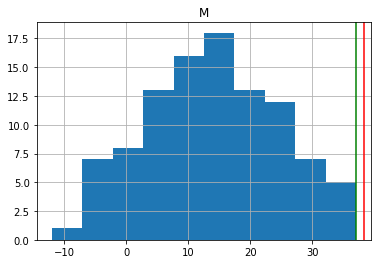

In [234]:
x = pd.DataFrame([10 * np.random.normal() + 15 for _ in range(100)], columns=['M'])
x_max = max(x['M'])
x_mean = x.drop(x['M'].idxmax())['M'].mean()
x_std = x.drop(x['M'].idxmax())['M'].std()
x_max_Z = (x_max - x_mean)/x_std
x_max_p = 1 - scipy.stats.norm.cdf(x_max_Z)

x.hist()
plt.axvline(scipy.stats.norm.ppf(.99)  * x_std + x_mean, color='r')
plt.axvline(x_max, color='g')
print("significance:", max(1 - x_max_p / alpha, 0.0))

In [ ]:
x = pd.DataFrame([10 * np.random.normal() + 15 for _ in range(100)], columns=['M'])
x_max = max(x['M'])
x_mean = x.drop(x['M'].idxmax())['M'].mean()
x_std = x.drop(x['M'].idxmax())['M'].std()
x_max_Z = (x_max - x_mean)/x_std
x_max_p = 1 - scipy.stats.norm.cdf(x_max_Z)

x.hist()
plt.axvline(scipy.stats.norm.ppf(.99)  * x_std + x_mean, color='r')
plt.axvline(x_max, color='g')
print("significance:", max(1 - x_max_p / alpha, 0.0))

In [346]:
def simulate(n):
    x = pd.DataFrame([10 * np.random.normal() + 15 for _ in range(n)], columns=['M'])
    x_max = max(x['M'])
    alpha = 1/n    
    
    x_mean = x['M'].mean()
    x_std = x['M'].std()
    x_max_Z = (x_max - x_mean)/x_std
    x_max_p = 1 - scipy.stats.norm.cdf(x_max_Z)

    x.hist(density=True)
    plt.axvline(scipy.stats.norm.ppf(1-1/n) * x_std + x_mean, color='r', label='expected max val')
    plt.axvline(x_max, color='g', label='actual max val')

    # plot normal dist
    x_axis = np.arange(min(x['M']), max(x['M']), .001)
    plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,x_mean,x_std))
    # Mean = 0, SD = 2.

    print("significance:", max(1 - x_max_p / alpha, 0.0))
    print("x_max_p", x_max_p)
    print("alpha (1/n)", alpha)
    

significance: 0.9971802493782258
x_max_p 2.8197506217741974e-06
alpha (1/n) 0.001


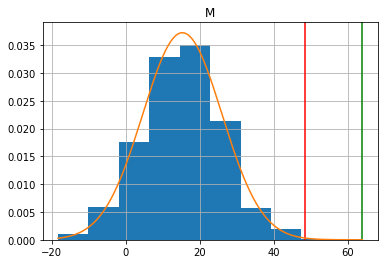

In [348]:
simulate(1000)

significance: 0.0
x_max_p 0.0014602342050724637
alpha (1/n) 0.001


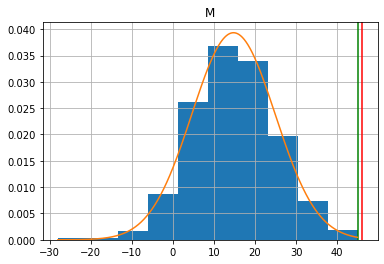

In [351]:
simulate(1000)

significance: 0.35295361397935565
x_max_p 0.0006470463860206443
alpha (1/n) 0.001


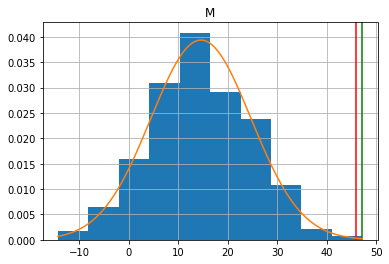

In [353]:
simulate(1000)

significance: 0.997779697503486


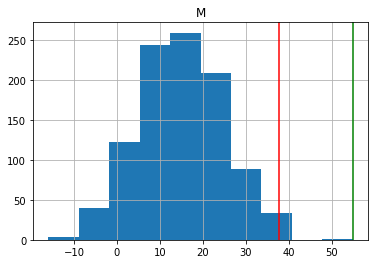

In [241]:
simulate(1000)

significance: 0.9470496492825933


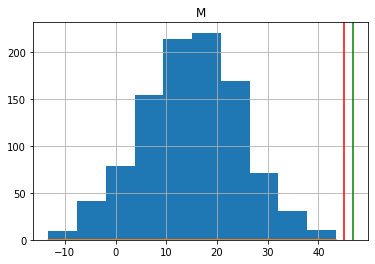

In [279]:
simulate(1000)

In [ ]:
scipy.stats.norm.ppf(.5, x_mean, x_std)

In [ ]:
scipy.stats.norm.pdf(x_mean, x_mean, x_std)

In [290]:
x_std

9.039491770341439

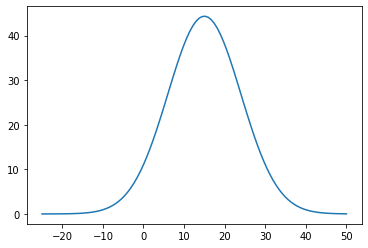

In [293]:
x_min = -25
x_max = 50
mean = 15 
std = 9
x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x,mean,std) * 1000
plt.plot(x, y)

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [ ]:
p_df[p_df['venue_name'] == 'CoRR']

In [ ]:
result_set = p_df
analysis_dimension = 'venue_name'
subspace = {'venue_name':'CoRR'}
result_set[result_set[analysis_dimension] == subspace[analysis_dimension]]

In [405]:
p_df = p_df.fillna('')
school_size = p_df.groupby('school').agg({"M":"sum"})
school_size[school_size['M'] > len(p_df) * .01]

,M
school,
,2984622


In [ ]:
p_df = pd.read_csv(papers_filename, encoding='mac_roman', dtype = {'school': str})

In [409]:
len(p_df)



0.9493745166098949